## Exercise 1 (1.5 + 1.5 = 3 points)

The perplexity of a model can also be defined as $2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}$. For the following exercise, use the log probabilities given this pretrained bigram language model. Tokenization is apparent from the tokens in the following table.

|A|B|log p(B\|A)|
|-|-|-|
|`The`|`man`|-1.8|
|`the`|`man`|-2.2|
|`the`|`post`|-2.7|
|`Man`|`the`|-5.1|
|`man`|`the`|-3.7|
|`man`|`shouted`|-2.9|
|`shouted`|`"`|-3.1|
|`post`|`!`|-3.1|
|`"`|`Man`|-1.9|
|`"`|`man`|-1.7|
|`!`|`"`|-1.2|
|`"`|`The`|-0.9|
|`"`|`the`|-1.2|

Assume probabilities not listed are $0^+$ (and the respective logarithm $-\infty$). For counting bigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ in your final counts. Therefore the weight of each bigram is $\frac{1}{|\text{words}|}$.

### 1.1 Lowercasing Input (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the post!"
the man shouted "man the post!"
```

Is lowercasing the input always a good idea? What are the advantages and disadvantages?

### 1.2 Unknown Tokens (1.5 points)

Compute the perplexity of the following two sentences.

```
The man shouted "Man the stations!"
The man shouted "Man the the!"
```

Elaborate on the computed results. 2. Do you consider both sentences to be equally probable?

### 1.1 Answer: Lowercasing Input (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the post!"
```

\begin{equation}
PP = 2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-1.8 - 2.9 - 3.1 - 1.9 - 5.1 - 2.7 - 3.1 - 1.2 - 0.9]}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-22.7]}
\end{equation}
\begin{equation}
 = 2^{+\frac{22.7}{9}}
\end{equation}
\begin{equation}
 = 2^{2.522}
\end{equation}
\begin{equation}
PP = 5.7447
\end{equation}

```
the man shouted "man the post!"
```

\begin{equation}
PP = 2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-2.2 - 2.9 - 3.1 - 1.7 - 3.7 - 2.7 - 3.1 - 1.2 - 1.2]}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-21.8]}
\end{equation}
\begin{equation}
 = 2^{+\frac{21.8}{9}}
\end{equation}
\begin{equation}
 = 2^{2.422}
\end{equation}
\begin{equation}
PP = 5.3600
\end{equation}

It is a good idea to lowercase the input as it would reduce the Perplexity, which means better predictability of the words.
Lowercasing is a very simple way of pre-processing of the data. The advantages of it is that it makes the prediction of the word easier. As many words like "The, the, tHe, thE, THE", they all mean "the" just some Uppercase Characters will create new tokens and hence impact the Probability. Hence by lowercasing we can save ourselves from this problem. However there are some languages where the meaning of the word also changes with the Uppercase words, like in Java "System" is a library to interact with the Console to read input or write output, whereas "system" in Python is used for communication with the Operating System. It make is hard to predict words where Preserving lower case is Important.

### 1.2 Answer: Unknown Tokens (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the stations!"
```

\begin{equation}
PP = 2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-1.8 - 2.9 - 3.1 - 1.9 - 5.1 -\infty -\infty - 1.2 - 0.9]}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-\infty]}
\end{equation}
\begin{equation}
 = 2^{\infty}
\end{equation}
\begin{equation}
 = undefined
\end{equation}
\begin{equation}
PP = 3.6751
\end{equation}

```
The man shouted "Man the the!"
```

\begin{equation}
PP = 2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-1.8 - 2.9 - 3.1 - 1.9 - 5.1 - 1.2 - 0.9]}
\end{equation}
\begin{equation}
 = 2^{-\frac{1}{9} [-16.9]}
\end{equation}
\begin{equation}
 = 2^{\frac{16.9}{9}}
\end{equation}
\begin{equation}
 = 2^{1.88}
\end{equation}
\begin{equation}
PP = 3.6751
\end{equation}

Both the Results are same, however they should not have equal probability as in the first sentence it is according to the gramatical rules, however the the is not possible as per the Grammar Rules of English. We can expect a word "stations" after the word "the", but no Grammatical rule supports two consecutive "the" in any sentence.

## Exercise 2 (N-gram models) (1 + 2 = 3 points)

### 2.1

Consider the formula on Page 28 in Chapter 2.

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (1 pt)


### 2.2

Given the corpus `orient_express.txt`, find the unigram, bigram, and trigram probability distributions of the text using the formulae obtained in 2.1. Implement the function `find_ngram_probs` in the file `exercise_2.py`. For counting bigrams and trigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ and trigrams $(w_{N-1}, w_N, w_1)$ and $(w_{N}, w_1, w_2)$ in your final counts.

Using the probabilities you obtain,
1. Plot the probabilities of the 20 most frequent unigrams
2. For the most frequent unigram, plot the 20 most frequent bigrams starting with that unigram
3. For the most frequent bigram, plot the 20 most frequent trigrams starting with that bigram

Use the function `plot_most_frequent`. Briefly explain your observations (1-2 lines).

NOTE: You must preprocess the text (remove punctuation, special characters, lowercase, tokenise) before you create your n-gram model. **You are NOT allowed to use nltk or any other tokeniser for this purpose**. Write your own function called `preprocess` in `exercise_2.py`. (2 points)

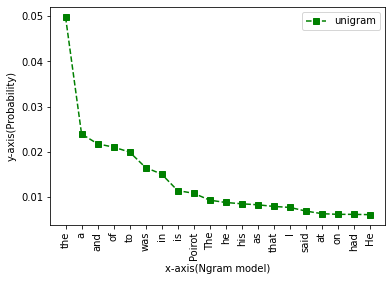

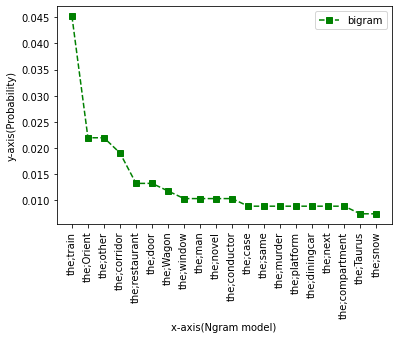

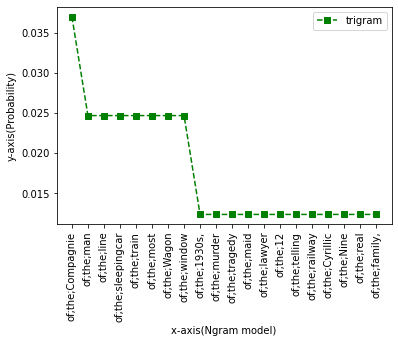

In [ ]:
import sys
sys.path.append('/content/exercise_2.py')

from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

#file = open("data/orient_express.txt", "r")
file = open("/content/orient_express.txt", "r")
text = file.read()

# TODO: Preprocess text
tokens = exercise_2.preprocess(text)

# TODO: Find conditional probabilities of unigrams, bigrams, trigrams
"""
Modify your function call based on how you have defined find_ngram_probs
in exercise_2.py
"""
unigrams = exercise_2.find_ngram_probs(tokens, model='unigram')
bigrams = exercise_2.find_ngram_probs(tokens, model='bigram')
trigrams = exercise_2.find_ngram_probs(tokens, model='trigram')

# TODO: Plot most frequent ngrams
"""
Modify the function signature as per your definition of plot_most_frequent
in exercise_2.py
"""
exercise_2.plot_most_frequent(unigrams, "unigram")
exercise_2.plot_most_frequent(bigrams, "bigram")
exercise_2.plot_most_frequent(trigrams, "trigram")

### Answer 2.1 :

We are given the following formula,
$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

<br>
For Unigram model, we consider single word and there is no history, so the probablity of every word is computed by following formula :
$$P(w) = \frac{count(w)}{N}$$

<br>
For Bigram model, we consider two words and there is history of one word, so the probability of data gram is computed by following formula :
$$P(w_2 | w_1) = \frac{count(w_1,w_2)}{count(w_1)}$$

<br>
For Trigram model, we consider three words and there is history of two word, so the probability of data gram is computed by following formula :
$$P(w_3 | w_1, w_2) = \frac{count(w_1,w_2,w_3)}{count(w_1,w_2)}$$
<br>
<br>
<br>
<br>

### Answer 2.2 :

In unigram and bigram graphs, there is sharp decline in probability after initial ngram. This states that there is significant difference between frequqncy of highly used ngram and other following ngrams. In trigram, there is step graph observed.     


## Exercise 3 (4 points)

### 3.1

Read the corpus file again and apply the preprocessing steps from Exercise 2. Split the corpus into a train and test sections; the size of the test section should be 10% of the corpus. Do this by implementing the `train_test_split` function in `exercise_3.py`.  Then, train 3-, 2- and 1-gram language models with your implementation from Exercise 2 on the train section. You may change the parameters of the functions if you find it necessary, but the code should still be written in the .py file. (1 point)

In [ ]:
import sys
sys.path.append('/content/exercise_2.py')
sys.path.append('/content/exercise_3.py')

from importlib import reload
import exercise_3, exercise_2
exercise_3 = reload(exercise_3)
exercise_2 = reload(exercise_2)

file = open("/content/orient_express.txt", "r")
#file = Path("../data/orient_express.txt").open('r')
text = file.read()

# TODO: apply tokenizer from exercise 2
tokenized = exercise_2.preprocess(text)

# TODO: split the corpus into a train corpus and a test corpus, with test_size=10%
train, test = exercise_3.train_test_split(tokenized, 0.1)

# TODO: train unigram, bigram, trigram LM using the method defined in exercise_2
# call each method as per your function definition

unigram_lm = exercise_2.find_ngram_probs(train, model='unigram')
bigram_lm = exercise_2.find_ngram_probs(train, model='bigram')
trigram_lm = exercise_2.find_ngram_probs(train, model='trigram')

### 3.2

Calculate relative frequencies for all three test corpora. Do this by implementing the function `relative_frequencies` in `exercise_3.py`. <br/>
Relative frequency is calculated as follows: <br/>
e. g. for bigrams, $ f(w_{i-1}, w_i) = \frac{N(w_{i-1}, w_i)}{N(\bullet,\bullet)}$, where $N( w_{i-1},w_i)$ is the count of the bigram and $N(\bullet,\bullet)$ is the total number of bigrams in the corpus. For consistency, you should include a bigram $(w_N, w_1)$, where $N$ is the length of the corpus (and likewise for trigrams) as you have done in 2.2. (0.5 points)

In [ ]:
# TODO: calculate unigram, bigram, trigram relative frequencies
unigram_rfs = exercise_3.relative_frequencies(test)
bigram_rfs = exercise_3.relative_frequencies(test, model='bigram')
trigram_rfs = exercise_3.relative_frequencies(test, model='trigram')

### 3.3

Implement the perplexity calculation for all 3 language models in the function `pp`, and perform the calculation on the test section of the corpus. You should use the perplexity formula from slide 21, chapter 3:
\begin{equation}
  PP = 2^{-\sum_{w,h}f(w,h)\log_2 P(w|h)}
\end{equation}

* Can you simply apply the formula to the language model and the relative frequencies? What would happen if an ngram from the test set is absent in the train set?

* Why is it possible to calculate perplexity with this formula? How does it differ from the formula in exercise 1 of this sheet?

(1.5 points)

In [ ]:
# "Smoothing"
unigram_rfs = {unigram:rf for unigram, rf in unigram_rfs.items() if unigram in unigram_lm}
bigram_rfs = {bigram:rf for bigram, rf in bigram_rfs.items() if bigram in bigram_lm}
trigram_rfs = {trigram:rf for trigram, rf in trigram_rfs.items() if trigram in trigram_lm}

# TODO: compute perplexity for each LM
unigram_pp = exercise_3.pp(unigram_lm, unigram_rfs)
bigram_pp = exercise_3.pp(bigram_lm, bigram_rfs)
trigram_pp = exercise_3.pp(trigram_lm, trigram_rfs)

### 3.4

Plot perplexity scores for all 3 language models. Do so by implementing the `plot_pps` function.
* Explain the differences between the language models.
* Is it always a good idea to increase the history for n-gram based language models? What can happen if n is too large? (1 point)

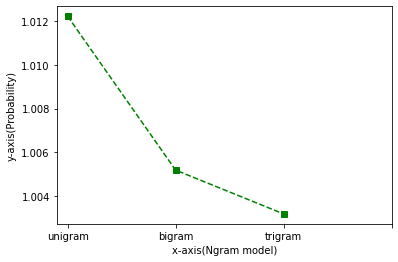

In [ ]:
# TODO: plot
pps = [unigram_pp, bigram_pp, trigram_pp]
exercise_3.plot_pps(pps)

### Answer 3.3 :

Yes we can apply the formula. It is possible the ngram is missing from training set but present in test set. This is done to identify that how well the model can predict or fit the test set. This helps in evaluation of model.

It is possible to calculate perplexity with this formula because perplexity can be calculated using conditional probabilities trained in the training corpus and relative frequencies from the test corpus.
The formula used in exercise 1 is not using the relative frequency and just using the probability to calculate the perplexity.
<br>

### Answer 3.4 :

There are different types of language models like trigram, bigram and unigram.
In unigram, there is no history coinsidered and probability of every word depends on its own. In bigram(n=2) and trigram model(n=3), probability of each words depends on n-1 words before it.
We are given the following formula.

It is not always good idea to increase the history for n-gram based models because if n becmoes too large then training times and model size increases. Word sequence also increases.

## Bonus (1.5 points)

Revisit exercise 1.

1. Come up with another metric (not language model) as an alternative to perplexity that could measure language model capabilities.
2. What are the advantages and disadvantages of such a metric in comparison to perplexity?
3. Compute your metric with respect to the four sentences (in exercise 1) and the provided language model.

## Answer: Bonus

1. An Alternative measure to Language Model Capabilities can be Word Error Rate (WER). In this Metric we will consider measure on Insertion, Deletion and Substitution of words when compared a Expected and a Predicted Document.
Insertion is adding of a new Word in the Predicted Document which was learned by our system.
Deletion is removing of a word in the Predicted Document by our System.
Substitution is replacing a word in the Predicted Document by a new Word.

There can also be a combination of these measures.

\begin{equation}
WER = {\frac{Insertion + Deletion + Substitution}{Total\ Number\ of\ Words}}
\end{equation}

Everytime Insertion, Deletion or Substitution is encountered Error value is incremented by 1

2. Advantages of this Metric is that we are considering multiple instances for our System to act in a new way.

Disadvantage is that our Metric does not account to the causes of error for example: listeners error, Various Dialects.

3. Compute metric with respect to the four sentences


```
Expected: The man shouted "Man the post!"
```
```
Predicted: the man shouted "man the post!"
```
Substitution :  Here one word "Man" is replaced by "man"

$Error\ Contribution:\ $

$Insertion = 0, Deletion = 0, Substitution = 1, Total\ Word\ Count = 9$
\begin{equation}
WER = {\frac{1}{9}}
\end{equation}


```
Expected: The man shouted "Man the post!"
```
```
Predicted: The man shouted "Man the stations!"
```
Combination of Insertion and Substitution :  Here one new word is inserted "stations" which replaces "post"

$Error\ Contribution:\ $

$Insertion = 1, Deletion = 0, Substitution = 1, Total\ Word\ Count = 9$
\begin{equation}
WER = {\frac{1 + 1}{9}} = {\frac{2}{9}}
\end{equation}


```
Expected: The man shouted "Man the post!"
```
```
Predicted: The man shouted "Man the the!"
```
Combination of Deletion and Substitution :  Here one word is deleted "post" which is replaced by "the"

$Error\ Contribution:\ $

$Insertion = 0, Deletion = 1, Substitution = 1, Total\ Word\ Count = 9$
\begin{equation}
WER = {\frac{1 + 1}{9}} = {\frac{2}{9}}
\end{equation}